In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.drop(columns="car_ID", inplace=True)

In [6]:
df.shape

(205, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [8]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
(df.isna().sum() / df.shape[0]) * 100

symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [10]:
df["symboling"] = df["symboling"].astype(str)

In [11]:
df["CarName"] = df['CarName'].str.split(' ', expand=True)[0]

In [12]:
df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
df["CarName"] = df["CarName"].replace({"maxda":"mazda","Nissan":"nissan","porcshce":"porsche",
                                 "toyouta":"toyota","vokswagen":"volkswagen","vw":"volkswagen"})

In [14]:
df["price_category"] = df["price"].apply(lambda x: "standard" if x <= 18500 else "high-end")

In [15]:
col_numeric = list(df.select_dtypes(exclude="object"))

col_categorical = list(df.select_dtypes(include="object"))

Text(0, 0.5, 'Count of Cars')

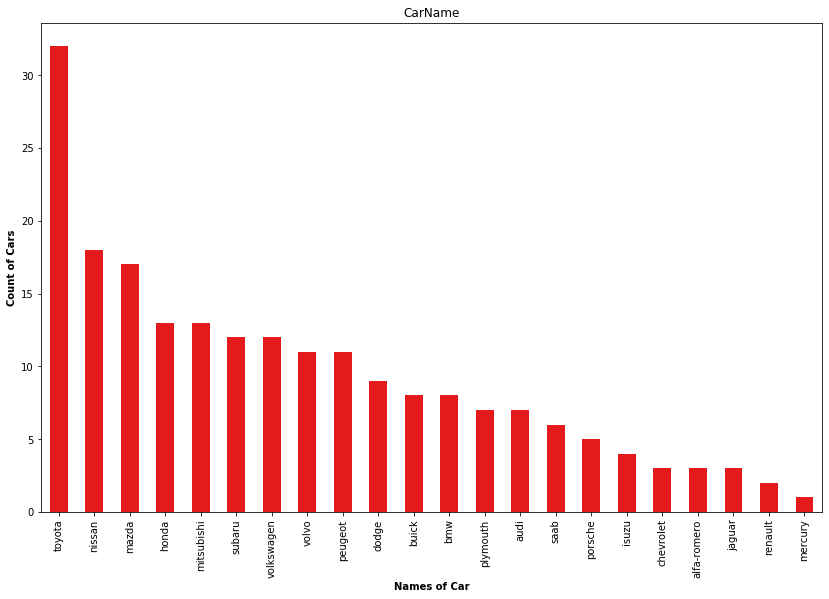

In [16]:
plt.rcParams['figure.figsize'] = [14,9]
ax=df['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

[Text(0, 0.5, 'Frequency of mileage in city'), Text(0.5, 0, 'Mileage in city')]

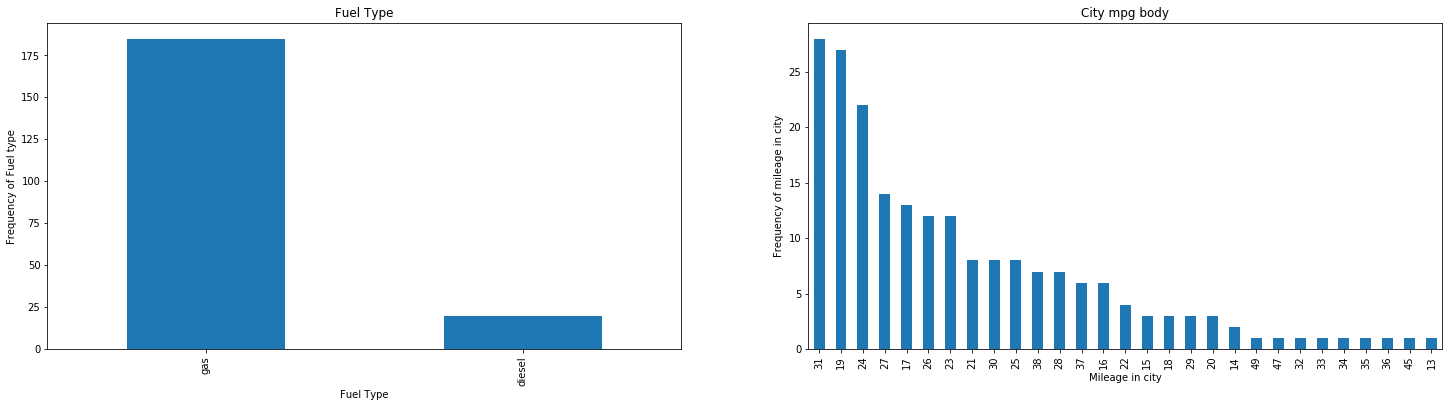

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1,2,1)
plt1 = df['fueltype'].value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,2,2)
plt1 = df['citympg'].value_counts().plot('bar')
plt.title('City mpg body')
plt1.set(xlabel = 'Mileage in city', ylabel='Frequency of mileage in city')

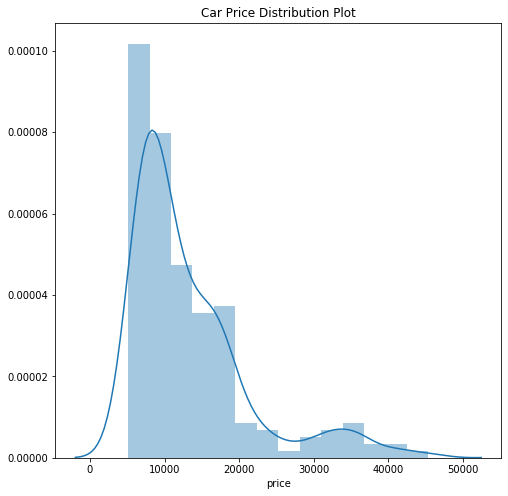

In [18]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

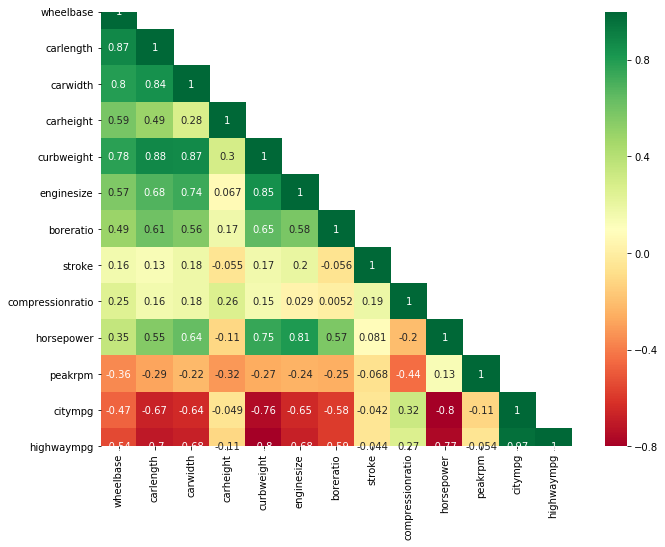

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns="price").corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(df.drop(columns="price").corr(), k=1))
plt.show()

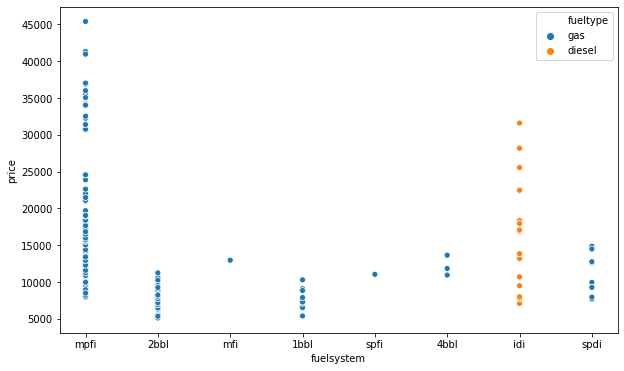

In [43]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

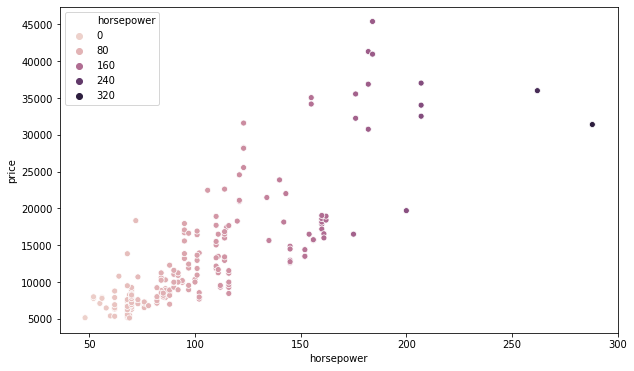

In [47]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'horsepower', data = df)
plt.show()

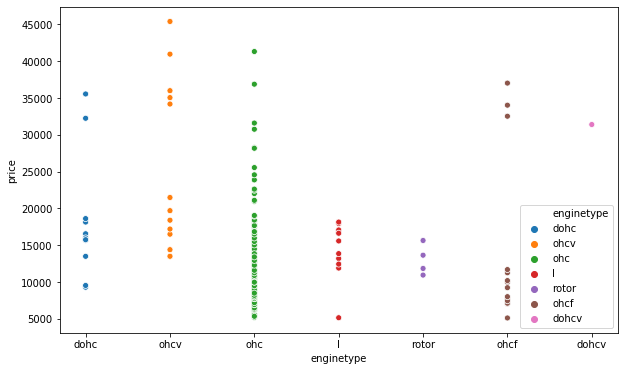

In [45]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'enginetype', y = 'price', hue = 'enginetype', data = df)
plt.show()

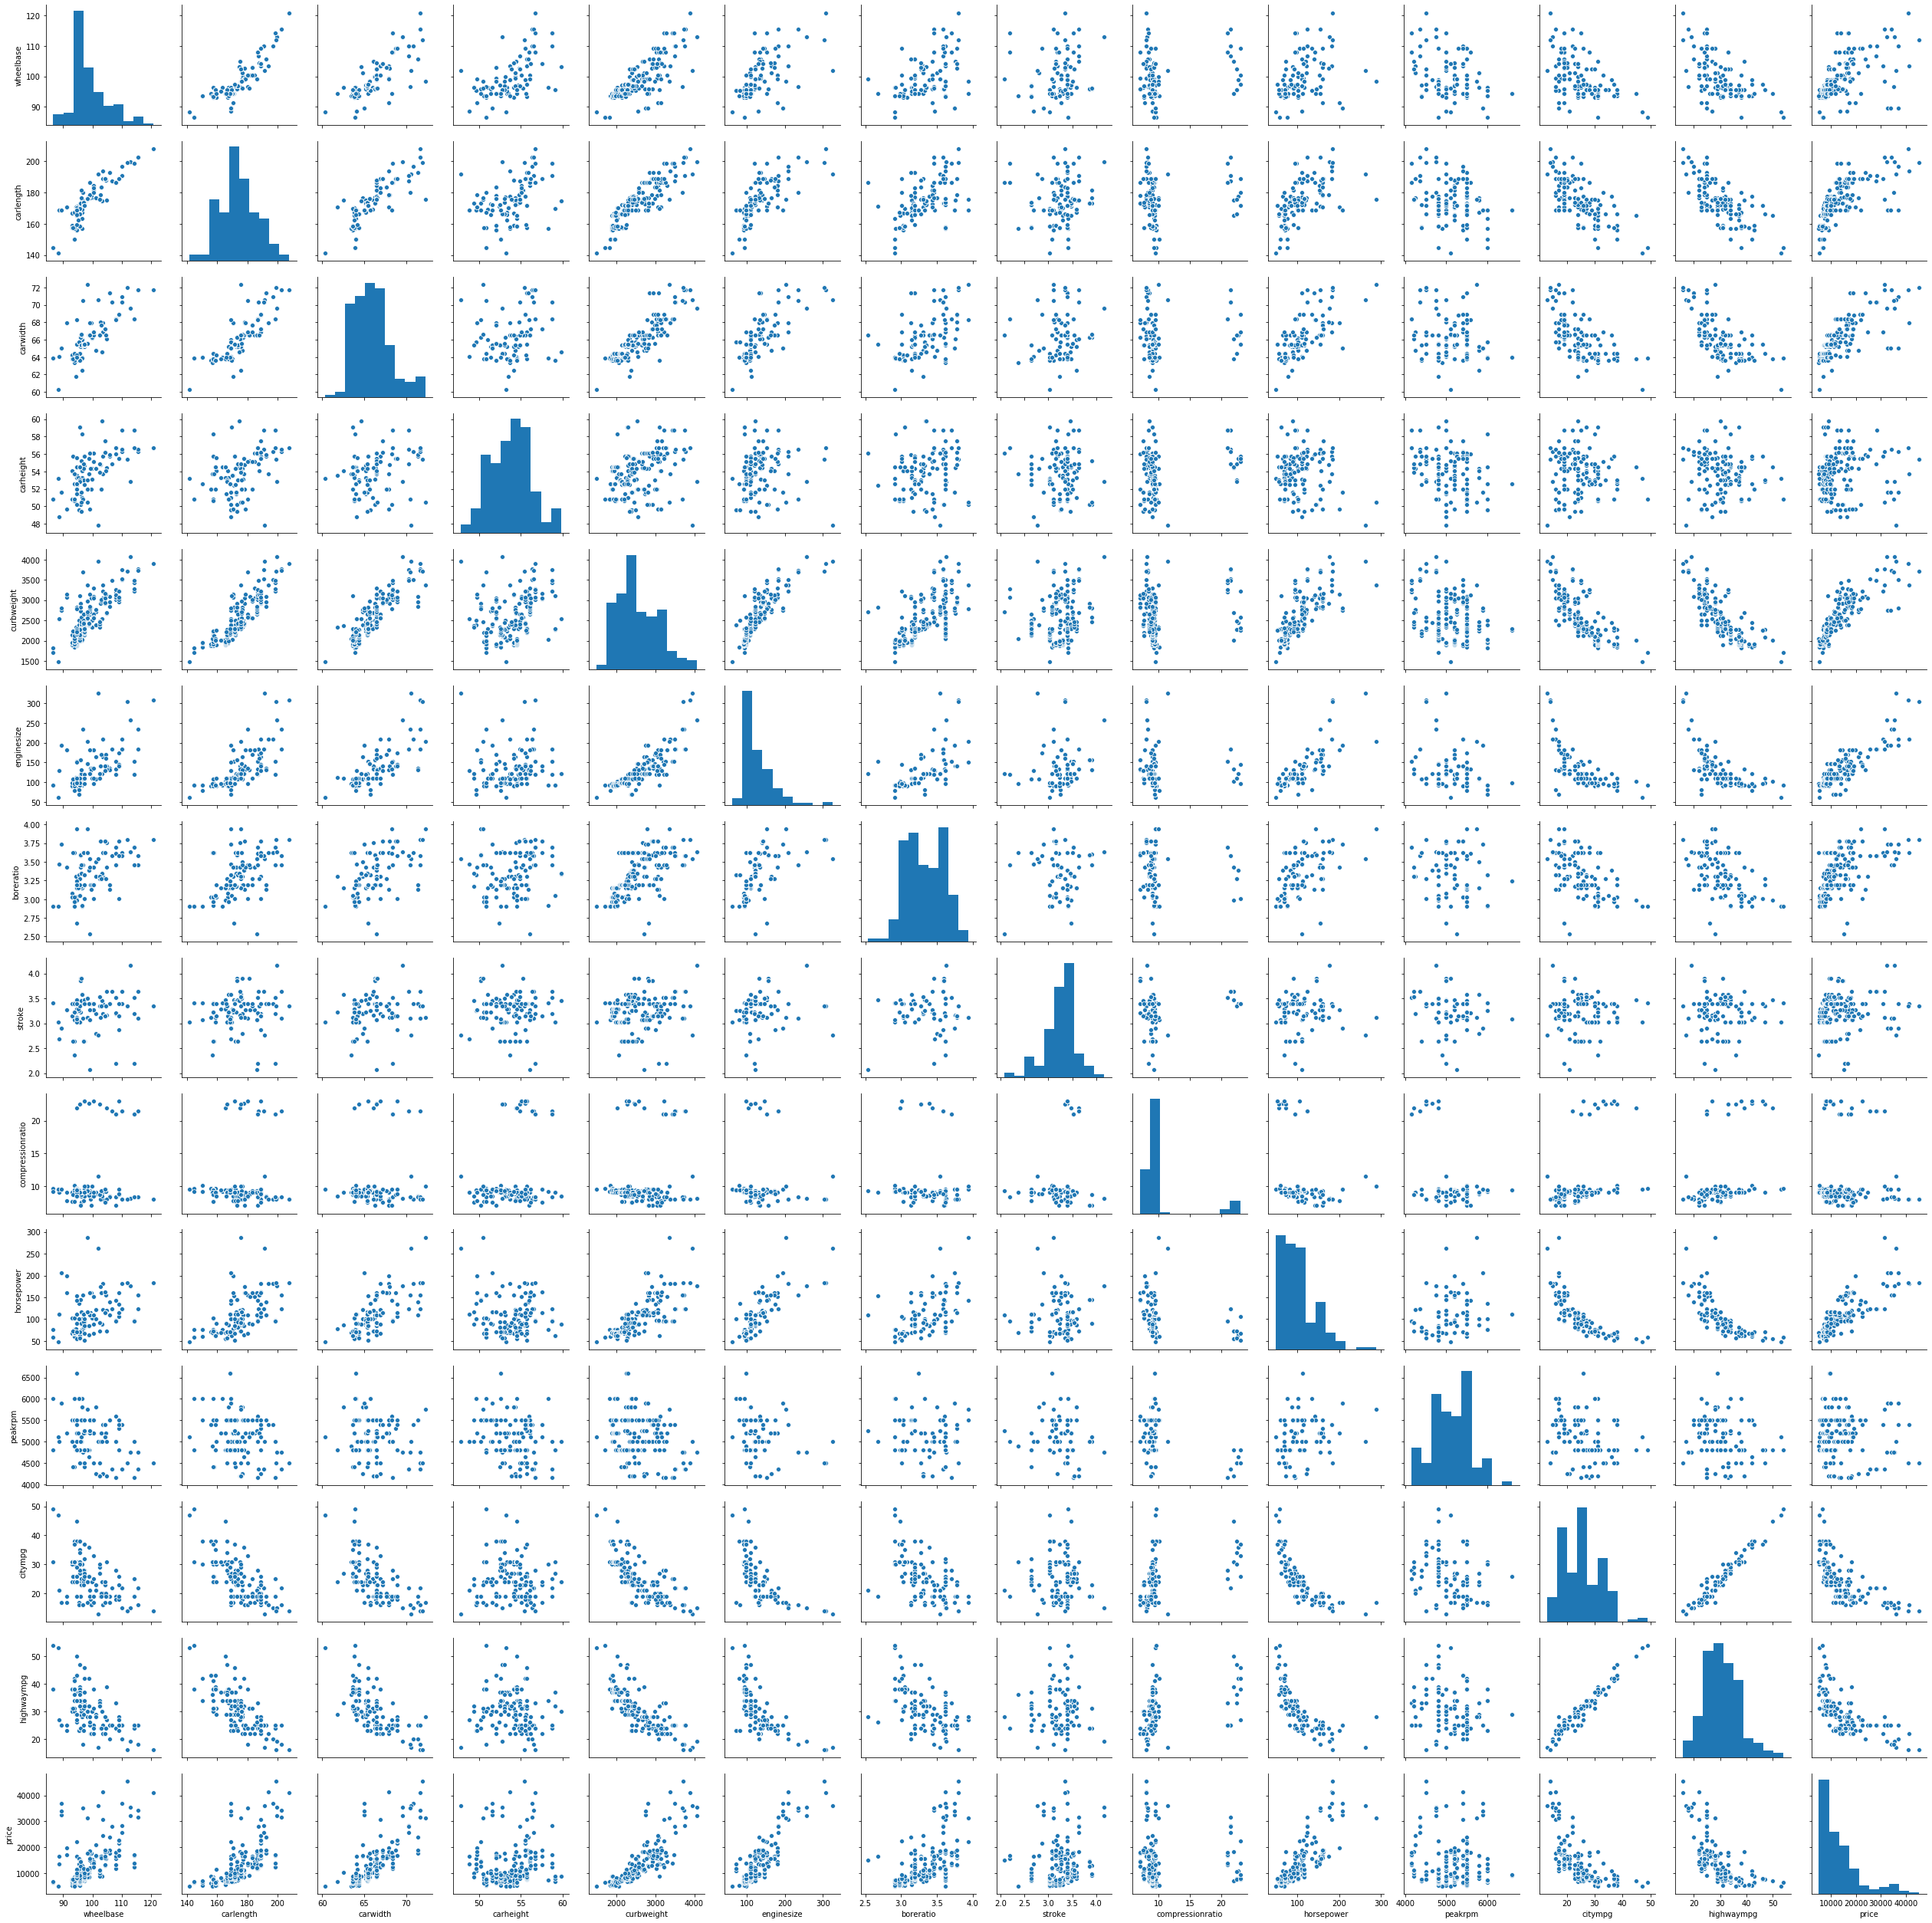

In [31]:
num_col = df.select_dtypes(exclude=['object']).columns
ax = sns.pairplot(df[num_col])

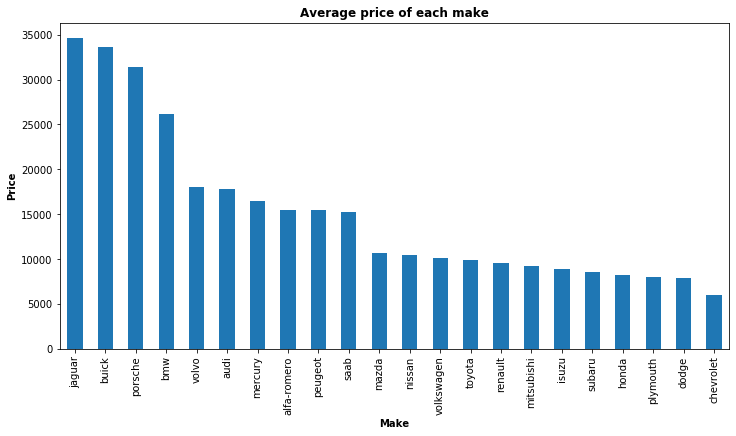

In [32]:
# average price of each make
df.groupby("CarName")["price"].mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.title("Average price of each make", fontweight="bold")
plt.ylabel("Price", fontweight="bold")
plt.xlabel("Make", fontweight="bold")
plt.show()

In [33]:
le = LabelEncoder()

df_encoded = df.drop(columns=["price_category"])
df_encoded[col_categorical[:-1]] = df_encoded[col_categorical[:-1]].apply(lambda col: le.fit_transform(col))

df_encoded.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,5,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,5,0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,0,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,1,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [34]:

X = df_encoded.drop(columns="price")

y = df_encoded["price"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
base_model = DecisionTreeRegressor()
base_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [37]:
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.9152518294034179


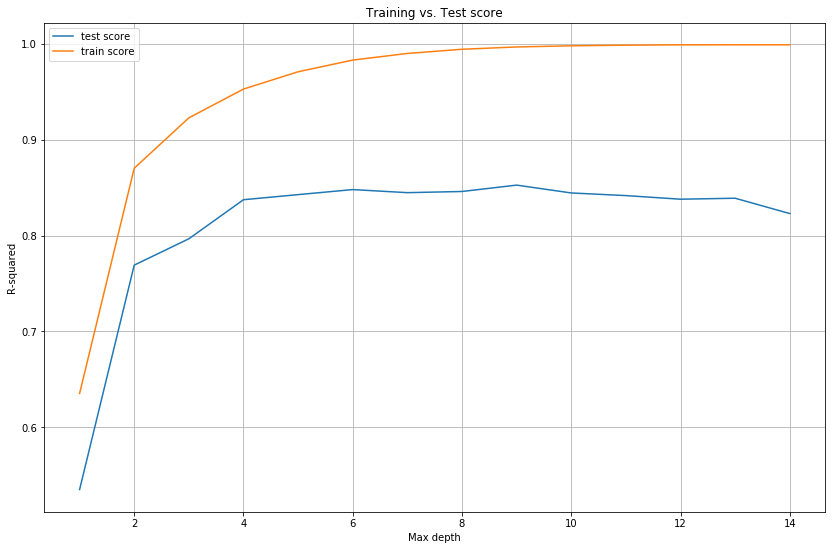

In [38]:
parameters = {"max_depth":list(range(1,15))}

base_model = DecisionTreeRegressor()
cv_model = GridSearchCV(estimator=base_model, param_grid=parameters, scoring='r2', return_train_score=True, cv=5).fit(X_train,y_train)

pd.DataFrame(cv_model.cv_results_)

# train and test scores
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_test_score"], label="test score")
plt.plot(pd.DataFrame(cv_model.cv_results_)["param_max_depth"], pd.DataFrame(cv_model.cv_results_)["mean_train_score"], label="train score")
plt.title("Training vs. Test score")
plt.ylabel("R-squared")
plt.xlabel("Max depth")
plt.legend()
plt.grid()
plt.show()

In [39]:
model = DecisionTreeRegressor(max_depth=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_pred, y_test))

R-squared: 0.9236879923076196
